#Statistics II

In the next 3 notebooks we will use the distributions we learned about in the 2a notebooks to generate mock data and we'll go further and fit an analytical solution to that data.

Additionally we'll introduce Monte Carlo methods and use them to calculate the value of $\pi$.

From stats you should be familiar with:

1. Generating 'random' data from an analyitical distibution using both `numpy.random` and `scipy.stats` packages
2. Finding 'summary statistics' such as 'moments' of a distribution of data using for example
* `numpy.mean`
* `numpy.std`
* `scipy.stats.kurtosis`
* `scipy.stats.skew`

3. Generating a model distribution using `scipy.stats.pdf` (a probability density function) - for example this is a function that our random data could be drawn from
4. Understanding that we could compare 'summary statistics' or 'moments' of a distribution to give us an idea as to whether our data is adequately represented by that distribution.
5. Plotting using `matplotlib.hist`
6. Additionally you should be familiar with reading help pages and finding useful information on them, e.g. 'inputs', 'outputs', 'functions' within a 'class', and examples on how to use that function/class.

## Learning objectives for today:

Today we will be using random-ness to solve problems.

1. Using `numpy.histogram` to save histogram data to an array
2. Use a PDF (probability density function) to draw random data. Creating mock data is a useful tool to test out a scientific hypothesis
3. Fit a model to this random data
4. Use multiple random draws to estimate the value of $\pi$. Using multiple draws in this way is called 'monte-carlo' - it is a very useful technique in many situations including fitting data and finding uncertainties on results - we WILL come back to this later in term so become familiar with it now!
5. Understanding what 'noise' is

# Generating mock data by drawing from distributions

Last time we saw that a valuble way to plot distributions was to histogram them using matplotlib's `.hist` function.

Numpy also has a histogram function which can allow you to recover histograms of the data:

`np.histogram` : https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

Read through the above help page.


Let's start with exploring how this function could be hepful to us.

Let's consider a uniform distribution and print the results of the `np.histogram` function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats

In [2]:
dist0 = rnd.uniform(10, size=100)
print(np.histogram(dist0))

(array([ 8,  4, 13, 15, 14,  7,  9,  9,  8, 13]), array([1.09055477, 1.97368875, 2.85682272, 3.73995669, 4.62309066,
       5.50622464, 6.38935861, 7.27249258, 8.15562655, 9.03876053,
       9.9218945 ]))


This is how we can store the data in arrays and call them

In [3]:
number, bin_edges = np.histogram(dist0)

You'll notice I wrote 'bin_edges' not 'bin_centers' - you might want to verify these are bin_edges by printing the size of the two arrays. In the exercise below you will be asked to plot the bin_centers against the number.

## Exercise:
Plot a histogram using `plt.bar` with the bin_centers plotted on the x-axis and the count in each bin on the y.

<BarContainer object of 10 artists>

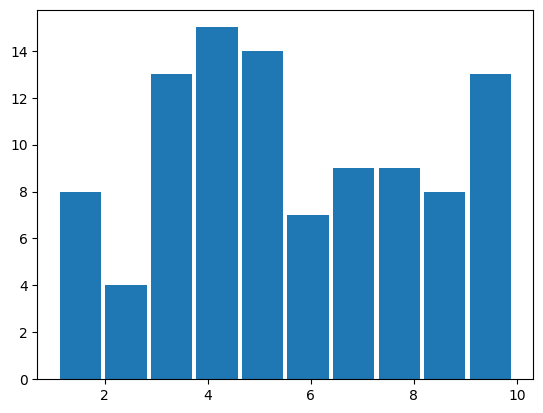

In [4]:
# Answer here
centre = ((bin_edges[0:-1]+bin_edges[1:])/2)
plt.bar(centre, number)

## Exercise:

An object emits photons which we detect as a Guassian shaped emission line. The emission line has a wavelength of 20 cm, a standard deviation of 1cm and a flux (total integrated emission under the gaussian) of 100 (in arbitrary flux units).
1. Use your knowledge of generating random data from a gaussian distribution to generate 1000 photons  
2. Make a histogram of this data
3. Overplot a Gaussian PDF of this data

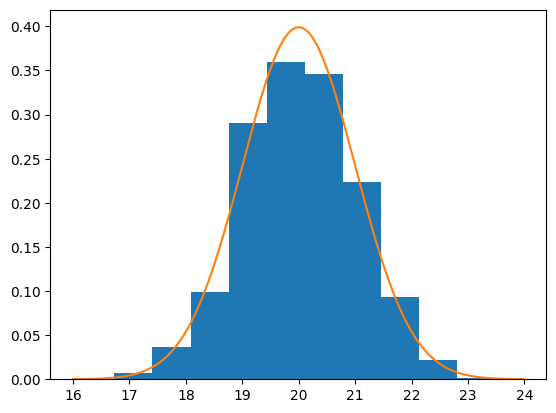

In [5]:
# Answer here
# Number 1
gauss_dist = rnd.normal(20., 1., size=1000)

# Number 2
plt.hist(gauss_dist, density=True);

# Number 3
x_axis = np.arange(16, 24, 0.01)
plt.plot(x_axis, stats.norm.pdf(x_axis,20,1))

Now we will do this again but this time drawing data from the `stats.norm.pdf` ourselves using a technique called 'rejection sampling'.

We will do this in a few steps which we'll explore step-by-step before writing into a function:
1. define our model
2. draw a data point
3. choose whether to acept or reject this data point
4. loop back to the top and draw again

## Exercise:
1. Build a model gaussian pdf with a mean of 10 and a std of 3 and plot it

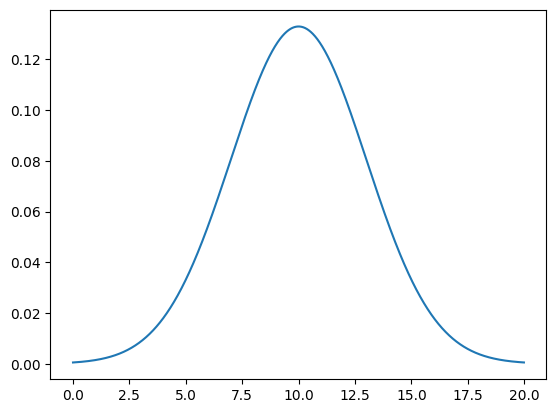

In [6]:
# Answer here
x = np.arange(0, 20, 0.01)
y = stats.norm.pdf(x, 10, 3)
plt.plot(x,y)

## Exercise:
2a. Use a function to draw a single random data point on the x axis from 0 to 20. Print it to verify it is between 0 and 20.

In [7]:
# Answer here
x_data = rnd.uniform(0,20,1)
print(x_data)


[0.8249599]


## Exercise:
2b. Use a function to draw a single random data point on the y axis. Use your plot above to decide what range to draw y from and print it to make sure it is within your chosen limits.

In [8]:
# Answer here
print('The max y-value of the plot above is %s' % (y.max()))
y_data = rnd.uniform(0,0.14,1)
print(y_data)


The max y-value of the plot above is 0.1329807601338109
[0.11873398]


## Exercise:
3. Write an if statement to choose whether to accept or reject your data point and print 'accept' or 'reject'. In this case you would like to keep values which are less than the model and reject those which are greater.  

In [9]:
# Answer here
if y_data < stats.norm.pdf(x_data, 10, 3):
  print('accept')
else:
  print('reject')

reject


## Exercise:
4. Now take the steps above and put them in a loop - draw 1000 data points. Store the accepted values by appending them to a list.

In [10]:
# Answer here
accept_x = []
accept_y = []
for i in range(0,1000):
  x_data = rnd.uniform(0,20,1)
  y_data = rnd.uniform(0,0.14,1)
  if y_data < stats.norm.pdf(x_data, 10, 3):
    accept_x.append(x_data)
    accept_y.append(y_data)

## Exercise:
Plot the model and the accepted x and y values.

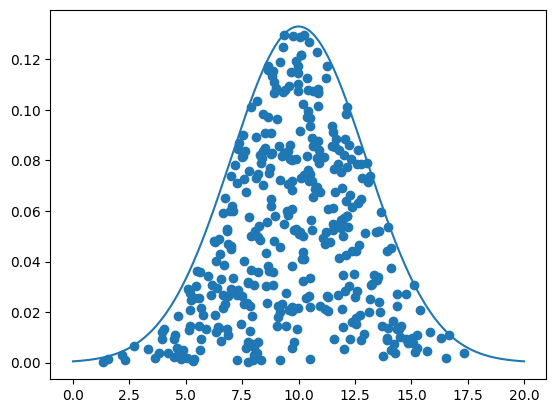

In [11]:
# Answer here
plt.plot(x,y)
plt.scatter(accept_x, accept_y)

## Exercise:
Now plot your accepted data points as a histogram. Think carefully about how to do this. There are many ways, one you have seen is very quick.

(array([ 5., 10., 27., 52., 76., 87., 62., 39., 20.,  5.]),
 array([ 1.31553244,  2.91855722,  4.52158201,  6.12460679,  7.72763158,
         9.33065636, 10.93368115, 12.53670593, 14.13973072, 15.7427555 ,
        17.34578029]),
 <BarContainer object of 10 artists>)

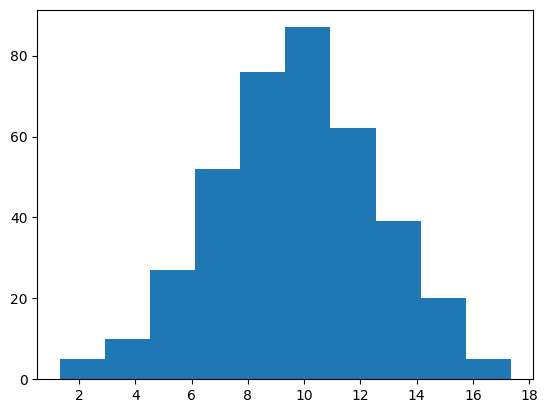

In [12]:
# Answer here
plt.hist(np.array(accept_x))

## Exercise
Can you think of a way to generate this data without using a loop (Hint: do you have to generate only one x and y at a time?)

(array([ 3.,  9., 23., 39., 75., 60., 65., 42., 14.,  8.]),
 array([ 1.55368931,  3.13852012,  4.72335094,  6.30818175,  7.89301256,
         9.47784337, 11.06267418, 12.64750499, 14.23233581, 15.81716662,
        17.40199743]),
 <BarContainer object of 10 artists>)

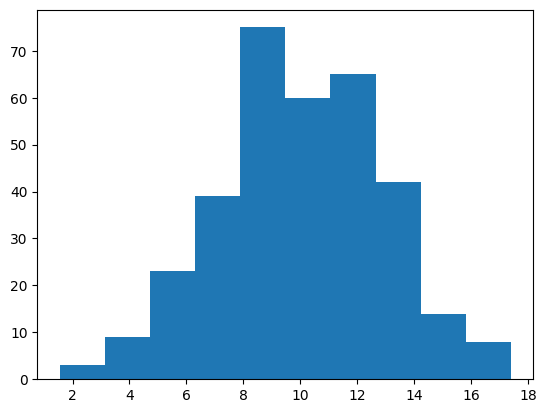

In [13]:
# Answer here
x_data = rnd.uniform(0,20,1000)
y_data = rnd.uniform(0,0.14,1000)

y = stats.norm.pdf(x_data, 10, 3)

accept_x = x_data[y_data < y]
accept_y = y_data[y_data < y]

plt.hist(accept_x)

Now we will see an example of how we could fit our data with a gaussian and verify that the mean and std are as we expected. We will come to things like this later on but it is good for you to see it now.

Explore the help page for `scipy.optimize.curvefit`. to understand what this does.

We'll start by defining a Gaussian model

In [14]:
from scipy.optimize import curve_fit

# Here I am defining my model which will be a gaussian distribution
def Gauss(x,Amp,mean,sigma):
    return Amp*np.exp(-1.*(x-mean)**2/(2*sigma**2))

## Exercise

Using your Gaussian data from the previous exercise, histogram your data using `np.histogram` and calculate the bin centres.

In [15]:
# Here we make a histogram of the data - it is this binned
# values we will fit our model against
number, bin_edges = np.histogram(accept_x)
bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2.

Next we use `curve_fit` to find the parameters which best fit our model given the data.

In [16]:
# Here we fit the data with curve_fit
parameters, covariance = curve_fit(Gauss, bin_centers, number)

# Here we report the paraameters - do you know why they are in this order?
amp = parameters[0]
mean = parameters[1]
sigma = parameters[2]
print('fit mean:', mean)
print('fit sigma:', sigma)

fit mean: 10.090392732371066
fit sigma: 3.0225318891823463


## Exercise

Put the parameters you have just determined into your model to calculate a curve which describes the data well.

Plot this curve along with the original data

**Hint:** Use plt.bar to plot the original data

(0.0, 20.0)

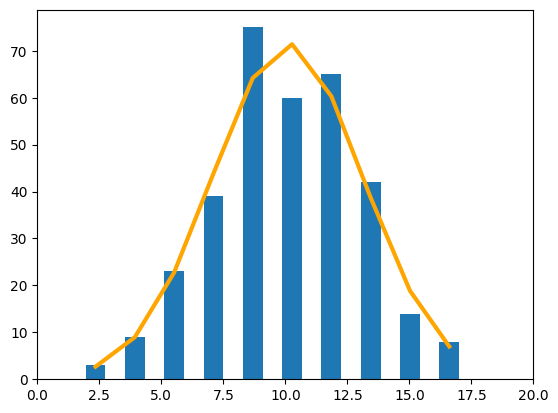

In [17]:
# Here we generate a model using our fit parameters and plot this and our data
# together so that we can check on the fit
fit_y = Gauss(bin_centers, amp, mean, sigma)
plt.bar(bin_centers, number, label='data')
plt.plot(bin_centers, fit_y, label='fit', color='orange', linewidth=3)
plt.xlim(0,20)